Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [66]:
NAME = "Juul Dorssers, #2009794#"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

# exam September 21st, 2018

With this python part of the exam you can earn at max. 4 points.




In the first cell of the notebook, give us your name and student number in the way indicated above. 

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam September 21, 2018".



## Generating and plotting data

We start by importing the usual libraries.

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

#### a) [0.5 point] Explain in words what the following code does. 

In [68]:
n_observations = 100
x = np.random.uniform(0,2,size=n_observations)
df = pd.DataFrame({'x': x})

The first line states that 'n_observations' is now equal to 100, this means that everytime we would print 'n_observations' we would get '100' as output. 
the second line states that 'x' is now a random variable that is uniformly distributed. They are distributed over the interval 0, 2. and a size of n_observations (so 100) means that 100 samples are drawn. So if we were to call x we would get a hundred values that are uniformly drawn over the interval 0,2.
The last line states that 'df' is now a dataframe, where the column with the name 'x' has those 100 uniformly drawn samples.

Now we are going to add some columns to the dataframe `df`.

#### b) [0.5 points] Add two columns to the data frame: (i) column `y` where $y=3*x+5$ and (ii) column `z` where $z = (x-1)^2$.

In [69]:
df['y']= 3*df['x']+5
df['z']= (df['x']-1)**2

df.head()

,x,y,z
0,1.145518,8.436555,0.021176
1,1.907881,10.723643,0.824248
2,0.459804,6.379413,0.291811
3,1.895443,10.686330,0.801819
4,1.892331,10.676992,0.796254


I want to add a new column in the dataframe, so i need so specify that 'y' is a new column in the dataframe already created, therefore i use the square brackets. Then i want y to be the formula given, only for every x that is in the dataframe, therefore I use the square brackets again to specify that I want to run the formula for the entire column 'x'. 
The same can be done for the variable 'z', only z has a different formula.

#### c) [0.5 point] Calculate the means and standard deviations for `x` and `y`. 

[hint: you can do this with one command or with four separate commands]

In [70]:
df.describe()

,x,y,z
count,100.000000,100.000000,100.000000
mean,0.986070,7.958211,0.341395
std,0.587067,1.761200,0.293861
min,0.015137,5.045411,0.000021
25%,0.462970,6.388909,0.085845
50%,0.969906,7.909717,0.269785
75%,1.470126,9.410378,0.572316
max,1.984967,10.954901,0.970160


You can use the describe command to get a statistics summary on the dataframe. From this we can see that the mean of the column x is approximately equal to 1.0338 and the standard deviation is approximately equal to 0.5635.
The mean of the column y is approximately equal to 8.1013 and the standard deviation is approximately equal to 1.6904

#### d) [0.5 points] Use your knowledge of statistics to explain the relations (i) between the means of `x` and `y` and (ii) between the standard deviations of `x` and `y`.

In [71]:
print("Since each value of y is just 3 * x + 5, the mean of y is also 3* the mean of x +5, so 3*1.0338+5 = ")
print(3*1.0338+5)
print("With the standard deviation it is a little different, here it is so that the standard deviation of y is b*the standard deviation of x,if you have a linear transformation of bX+a like we do. So, the standard deviation of y is 3*0.5635 = ")
print(3*0.5635)

Since each value of y is just 3 * x + 5, the mean of y is also 3* the mean of x +5, so 3*1.0338+5 = 
8.1014
With the standard deviation it is a little different, here it is so that the standard deviation of y is b*the standard deviation of x,if you have a linear transformation of bX+a like we do. So, the standard deviation of y is 3*0.5635 = 
1.6905000000000001


#### e) [1 point] Plot a histogram of `x` with fractions (not absolute numbers) on the vertical axis. Add the label $x$ to the horizontal axis.

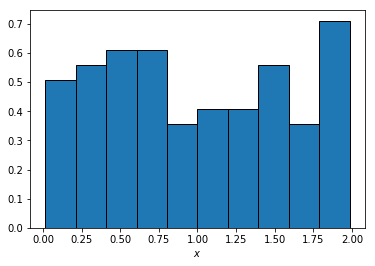

In [72]:
plt.hist(df['x'], normed = True, edgecolor = 'black')
plt.xlabel('$x$')
plt.show()

for a histogram, you have to use plt.hist function. On the x-axis we want the variable x, so that is the first command within the brackets and on the y-axis we want fractions, which is why normed = True. I found it a bit difficult to see which bar is which when it is one blue spot, so i added edgecolor, now there is a clear seperation between the bars. 
The x label is added by using the second line of code. 
Then the plot is shown using the third line.

#### f) [0.5 points] Make a scatter plot of `y` vs `z` with the label $y$ on the horizontal axis and the label $z$ on the vertical axis.

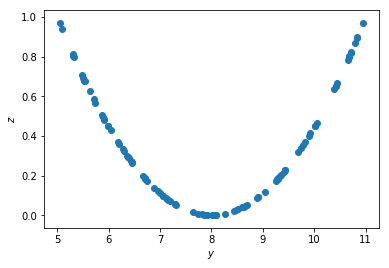

In [73]:
plt.scatter(df['y'], df['z'])
plt.xlabel('$y$')
plt.ylabel('$z$')
plt.show()

For a scatter plot, we use the plt.scatter function. on the x-axis the y column of the dataframe is plotted and on the y-axis the z column of the dataframe is plotted. 
Then the label commands are used again to identify which is which.

This relation looks rather "perfect". We want to make a "noisy" version of this graph.

#### g) [0.5 points] Create a variable `z2` equal to `z` but with some "noise" added to it. That is, add a random variable (vector) with mean 0 to `z` to get `z2`. Then plot `y` against `z2`. Adjust the standard deviation of the "noise" variable such that the shape of the figure under f) can still be recognized but not perfectly.

[hint: under a) you have seen the library that contains functions to create a "noisy variable"]

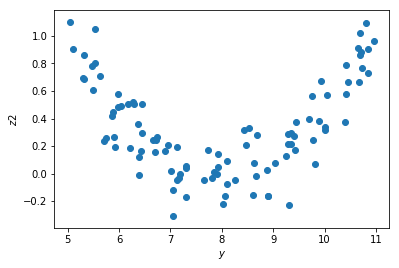

In [74]:
df['z2'] = df['z'] + np.random.normal(0, 0.15, size = 100)
plt.scatter(df['y'], df['z2'])
plt.xlabel('$y$')
plt.ylabel('$z2$')
plt.show()

## Github

After you have finished, we need to upload this notebook on github.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.